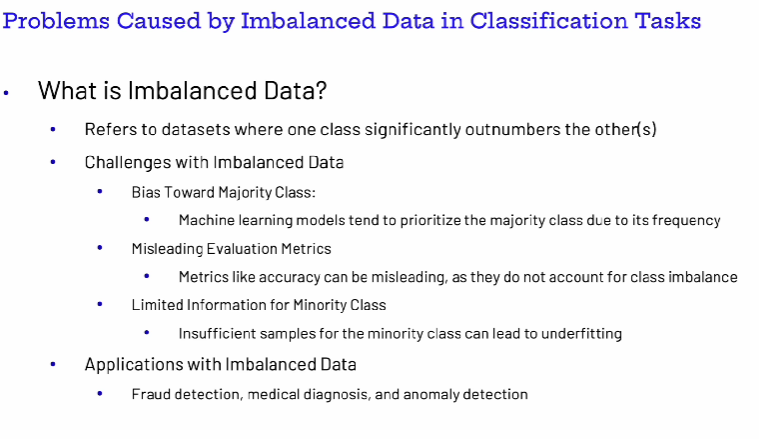
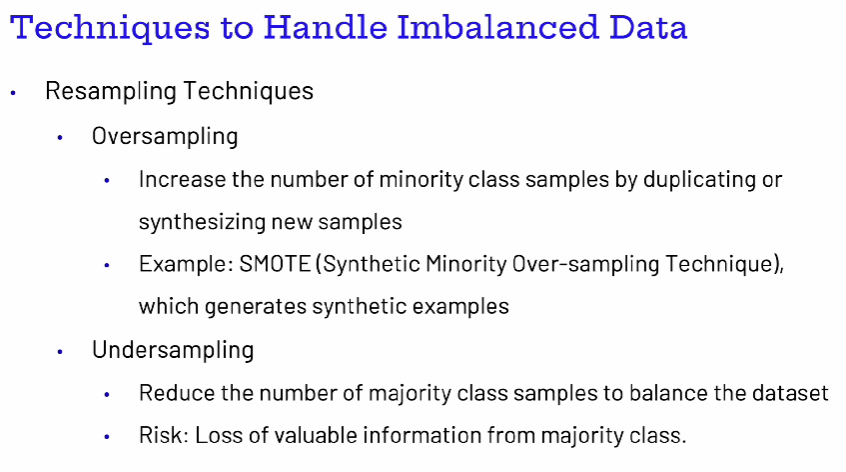
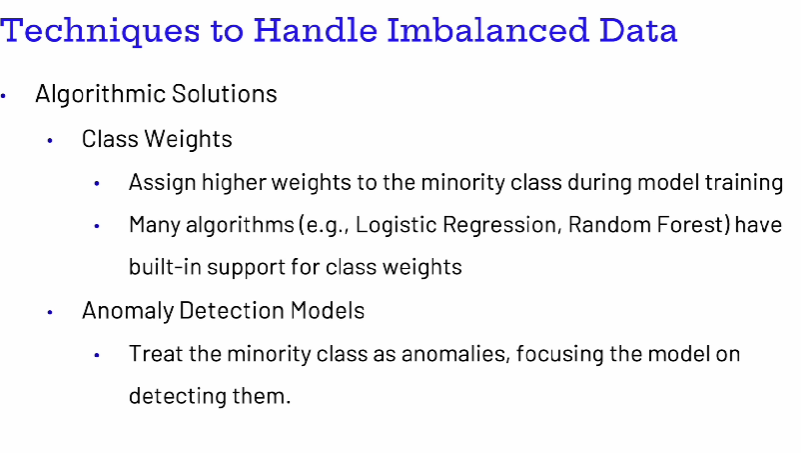
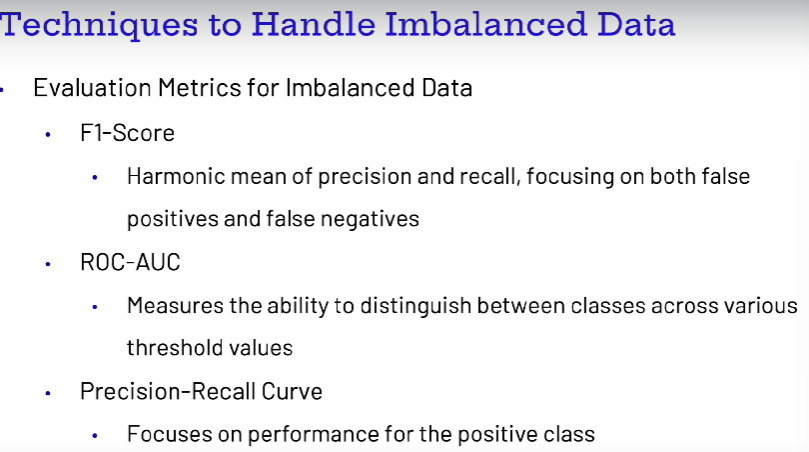

In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [3]:
url ="https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
x= df.drop(columns=['Class'])
y=df['Class']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56864\n           1       0.94      0.82      0.87        98\n\n    accuracy                           1.00     56962\n   macro avg       0.97      0.91      0.94     56962\nweighted avg       1.00      1.00      1.00     56962\n'

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])
roc_auc

0.9630272515590367

In [11]:
!pip install imblearn



   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [13]:
# Display new class distribution
pd.Series(y_resampled).value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [15]:
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(x_resampled,  y_resampled)
y_pred = rf_model_smote.predict(x_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56864\n           1       0.83      0.83      0.83        98\n\n    accuracy                           1.00     56962\n   macro avg       0.91      0.91      0.91     56962\nweighted avg       1.00      1.00      1.00     56962\n'

In [16]:
roc_auc_smote = roc_auc_score(y_test, rf_model_smote.predict_proba(x_test)[:, 1])
roc_auc_smote

0.9644234399584257